### prepare

In [1]:
# import
# pip3 install -U scikit-learn
# sudo pacman -S python-scikit-learn
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sys import maxsize
np.set_printoptions(threshold=maxsize)
import matplotlib.pyplot as plt
from tensorflow import keras
#from google.colab import files
import tensorflow as tf
import math

In [2]:
# data: muma
ttech24 = np.loadtxt(open("data_muma/muma-24.csv", "rb"), delimiter=",", skiprows=0)
ttech28 = np.loadtxt(open("data_muma/muma-28.csv", "rb"), delimiter=",", skiprows=0)
ttech32 = np.loadtxt(open("data_muma/muma-32.csv", "rb"), delimiter=",", skiprows=0)
ttech24[:]

array([[4.00001e+01, 1.01282e+00, 2.19089e-01, 6.02998e-01],
       [4.00001e+01, 1.01443e+00, 2.33335e-01, 5.90039e-01],
       [4.00001e+01, 1.01638e+00, 2.49145e-01, 5.73676e-01],
       [4.00001e+01, 1.01874e+00, 2.66930e-01, 5.53798e-01],
       [4.00001e+01, 1.02166e+00, 2.87218e-01, 5.30371e-01],
       [4.00001e+01, 1.02532e+00, 3.10635e-01, 5.04597e-01],
       [4.00001e+01, 1.03001e+00, 3.37816e-01, 4.76335e-01],
       [4.00001e+01, 1.03614e+00, 3.70336e-01, 4.46297e-01],
       [4.00001e+01, 1.04434e+00, 4.09797e-01, 4.14482e-01],
       [4.00001e+01, 1.05579e+00, 4.58022e-01, 3.79677e-01],
       [4.00001e+01, 1.07239e+00, 5.17816e-01, 3.42152e-01],
       [4.00001e+01, 1.09788e+00, 5.94578e-01, 3.02381e-01],
       [4.00001e+01, 1.14004e+00, 6.96777e-01, 2.61380e-01],
       [4.00001e+01, 1.21830e+00, 8.36610e-01, 2.18808e-01],
       [4.00001e+01, 1.39418e+00, 1.02991e+00, 1.74254e-01],
       [6.99999e+01, 1.03219e+00, 3.44154e-01, 6.53127e-01],
       [6.99999e+01, 1.0

In [3]:
# add volute
ttech24 = np.insert(ttech24, 0, values=24, axis=1)
ttech28 = np.insert(ttech28, 0, values=28, axis=1)
ttech32 = np.insert(ttech32, 0, values=32, axis=1)
ttech24[:]

array([[2.40000e+01, 4.00001e+01, 1.01282e+00, 2.19089e-01, 6.02998e-01],
       [2.40000e+01, 4.00001e+01, 1.01443e+00, 2.33335e-01, 5.90039e-01],
       [2.40000e+01, 4.00001e+01, 1.01638e+00, 2.49145e-01, 5.73676e-01],
       [2.40000e+01, 4.00001e+01, 1.01874e+00, 2.66930e-01, 5.53798e-01],
       [2.40000e+01, 4.00001e+01, 1.02166e+00, 2.87218e-01, 5.30371e-01],
       [2.40000e+01, 4.00001e+01, 1.02532e+00, 3.10635e-01, 5.04597e-01],
       [2.40000e+01, 4.00001e+01, 1.03001e+00, 3.37816e-01, 4.76335e-01],
       [2.40000e+01, 4.00001e+01, 1.03614e+00, 3.70336e-01, 4.46297e-01],
       [2.40000e+01, 4.00001e+01, 1.04434e+00, 4.09797e-01, 4.14482e-01],
       [2.40000e+01, 4.00001e+01, 1.05579e+00, 4.58022e-01, 3.79677e-01],
       [2.40000e+01, 4.00001e+01, 1.07239e+00, 5.17816e-01, 3.42152e-01],
       [2.40000e+01, 4.00001e+01, 1.09788e+00, 5.94578e-01, 3.02381e-01],
       [2.40000e+01, 4.00001e+01, 1.14004e+00, 6.96777e-01, 2.61380e-01],
       [2.40000e+01, 4.00001e+01, 1.21

In [4]:
# row split
s1=15; s2=30; s3=45; s4=60; s5=75; s6=90; s7=105; s8=120; s9=135; s10=150

In [5]:
# extract speedlines x
x_data1_24=ttech24 [0:s1,[0,1,2]];
x_data2_24=ttech24[s1:s2,[0,1,2]];
x_data3_24=ttech24[s2:s3,[0,1,2]];
x_data4_24=ttech24[s3:s4,[0,1,2]];
x_data5_24=ttech24[s4:s5,[0,1,2]];
x_data6_24=ttech24[s5:s6,[0,1,2]];
x_data7_24=ttech24[s6:s7,[0,1,2]];
x_data8_24=ttech24[s7:s8,[0,1,2]];
x_data9_24=ttech24[s8:s9,[0,1,2]];
x_data10_24=ttech24[s9:s10,[0,1,2]];
#
x_data1_28=ttech28 [0:s1,[0,1,2]];
x_data2_28=ttech28[s1:s2,[0,1,2]];
x_data3_28=ttech28[s2:s3,[0,1,2]];
x_data4_28=ttech28[s3:s4,[0,1,2]];
x_data5_28=ttech28[s4:s5,[0,1,2]];
x_data6_28=ttech28[s5:s6,[0,1,2]];
x_data7_28=ttech28[s6:s7,[0,1,2]];
x_data8_28=ttech28[s7:s8,[0,1,2]];
x_data9_28=ttech28[s8:s9,[0,1,2]];
x_data10_28=ttech28[s9:s10,[0,1,2]];
#
x_data1_32=ttech32 [0:s1,[0,1,2]];
x_data2_32=ttech32[s1:s2,[0,1,2]];
x_data3_32=ttech32[s2:s3,[0,1,2]];
x_data4_32=ttech32[s3:s4,[0,1,2]];
x_data5_32=ttech32[s4:s5,[0,1,2]];
x_data6_32=ttech32[s5:s6,[0,1,2]];
x_data7_32=ttech32[s6:s7,[0,1,2]];
x_data8_32=ttech32[s7:s8,[0,1,2]];
x_data9_32=ttech32[s8:s9,[0,1,2]];
x_data10_32=ttech32[s9:s10,[0,1,2]];
x_data1_24[1:]

array([[24.     , 40.0001 ,  1.01443],
       [24.     , 40.0001 ,  1.01638],
       [24.     , 40.0001 ,  1.01874],
       [24.     , 40.0001 ,  1.02166],
       [24.     , 40.0001 ,  1.02532],
       [24.     , 40.0001 ,  1.03001],
       [24.     , 40.0001 ,  1.03614],
       [24.     , 40.0001 ,  1.04434],
       [24.     , 40.0001 ,  1.05579],
       [24.     , 40.0001 ,  1.07239],
       [24.     , 40.0001 ,  1.09788],
       [24.     , 40.0001 ,  1.14004],
       [24.     , 40.0001 ,  1.2183 ],
       [24.     , 40.0001 ,  1.39418]])

In [6]:
# extract speedlines y
y_data1_24=ttech24 [0:s1,[3,4]]
y_data2_24=ttech24[s1:s2,[3,4]]
y_data3_24=ttech24[s2:s3,[3,4]]
y_data4_24=ttech24[s3:s4,[3,4]]
y_data5_24=ttech24[s4:s5,[3,4]]
y_data6_24=ttech24[s5:s6,[3,4]]
y_data7_24=ttech24[s6:s7,[3,4]]
y_data8_24=ttech24[s7:s8,[3,4]]
y_data9_24=ttech24[s8:s9,[3,4]]
y_data10_24=ttech24[s9:s10,[3,4]]
#
y_data1_28=ttech28 [0:s1,[3,4]]
y_data2_28=ttech28[s1:s2,[3,4]]
y_data3_28=ttech28[s2:s3,[3,4]]
y_data4_28=ttech28[s3:s4,[3,4]]
y_data5_28=ttech28[s4:s5,[3,4]]
y_data6_28=ttech28[s5:s6,[3,4]]
y_data7_28=ttech28[s6:s7,[3,4]]
y_data8_28=ttech28[s7:s8,[3,4]]
y_data9_28=ttech28[s8:s9,[3,4]]
y_data10_28=ttech28[s9:s10,[3,4]]
#
y_data1_32=ttech32 [0:s1,[3,4]]
y_data2_32=ttech32[s1:s2,[3,4]]
y_data3_32=ttech32[s2:s3,[3,4]]
y_data4_32=ttech32[s3:s4,[3,4]]
y_data5_32=ttech32[s4:s5,[3,4]]
y_data6_32=ttech32[s5:s6,[3,4]]
y_data7_32=ttech32[s6:s7,[3,4]]
y_data8_32=ttech32[s7:s8,[3,4]]
y_data9_32=ttech32[s8:s9,[3,4]]
y_data10_32=ttech32[s9:s10,[3,4]]
y_data1_24[1:]

array([[0.233335, 0.590039],
       [0.249145, 0.573676],
       [0.26693 , 0.553798],
       [0.287218, 0.530371],
       [0.310635, 0.504597],
       [0.337816, 0.476335],
       [0.370336, 0.446297],
       [0.409797, 0.414482],
       [0.458022, 0.379677],
       [0.517816, 0.342152],
       [0.594578, 0.302381],
       [0.696777, 0.26138 ],
       [0.83661 , 0.218808],
       [1.02991 , 0.174254]])

In [7]:
# construct x and y
x_data = x_data1_24; y_data = y_data1_24
x_data = np.append(x_data,x_data2_24,axis=0); y_data = np.append(y_data,y_data2_24,axis=0)
x_data = np.append(x_data,x_data3_24,axis=0); y_data = np.append(y_data,y_data3_24,axis=0)
x_data = np.append(x_data,x_data4_24,axis=0); y_data = np.append(y_data,y_data4_24,axis=0)
x_data = np.append(x_data,x_data5_24,axis=0); y_data = np.append(y_data,y_data5_24,axis=0)
x_data = np.append(x_data,x_data6_24,axis=0); y_data = np.append(y_data,y_data6_24,axis=0)
x_data = np.append(x_data,x_data7_24,axis=0); y_data = np.append(y_data,y_data7_24,axis=0)
x_data = np.append(x_data,x_data8_24,axis=0); y_data = np.append(y_data,y_data8_24,axis=0)
x_data = np.append(x_data,x_data9_24,axis=0); y_data = np.append(y_data,y_data9_24,axis=0)
x_data = np.append(x_data,x_data10_24,axis=0); y_data = np.append(y_data,y_data10_24,axis=0)
#
x_data = np.append(x_data,x_data1_28,axis=0); y_data = np.append(y_data,y_data1_28,axis=0)
x_data = np.append(x_data,x_data2_28,axis=0); y_data = np.append(y_data,y_data2_28,axis=0)
x_data = np.append(x_data,x_data3_28,axis=0); y_data = np.append(y_data,y_data3_28,axis=0)
x_data = np.append(x_data,x_data4_28,axis=0); y_data = np.append(y_data,y_data4_28,axis=0)
x_data = np.append(x_data,x_data5_28,axis=0); y_data = np.append(y_data,y_data5_28,axis=0)
x_data = np.append(x_data,x_data6_28,axis=0); y_data = np.append(y_data,y_data6_28,axis=0)
x_data = np.append(x_data,x_data7_28,axis=0); y_data = np.append(y_data,y_data7_28,axis=0)
x_data = np.append(x_data,x_data8_28,axis=0); y_data = np.append(y_data,y_data8_28,axis=0)
x_data = np.append(x_data,x_data9_28,axis=0); y_data = np.append(y_data,y_data9_28,axis=0)
x_data = np.append(x_data,x_data10_28,axis=0); y_data = np.append(y_data,y_data10_28,axis=0)
#
x_data = np.append(x_data,x_data1_32,axis=0); y_data = np.append(y_data,y_data1_32,axis=0)
x_data = np.append(x_data,x_data2_32,axis=0); y_data = np.append(y_data,y_data2_32,axis=0)
x_data = np.append(x_data,x_data3_32,axis=0); y_data = np.append(y_data,y_data3_32,axis=0)
x_data = np.append(x_data,x_data4_32,axis=0); y_data = np.append(y_data,y_data4_32,axis=0)
x_data = np.append(x_data,x_data5_32,axis=0); y_data = np.append(y_data,y_data5_32,axis=0)
x_data = np.append(x_data,x_data6_32,axis=0); y_data = np.append(y_data,y_data6_32,axis=0)
x_data = np.append(x_data,x_data7_32,axis=0); y_data = np.append(y_data,y_data7_32,axis=0)
x_data = np.append(x_data,x_data8_32,axis=0); y_data = np.append(y_data,y_data8_32,axis=0)
x_data = np.append(x_data,x_data9_32,axis=0); y_data = np.append(y_data,y_data9_32,axis=0)
x_data = np.append(x_data,x_data10_32,axis=0); y_data = np.append(y_data,y_data10_32,axis=0)

In [8]:
# check x
x_data[1:]

array([[ 24.     ,  40.0001 ,   1.01443],
       [ 24.     ,  40.0001 ,   1.01638],
       [ 24.     ,  40.0001 ,   1.01874],
       [ 24.     ,  40.0001 ,   1.02166],
       [ 24.     ,  40.0001 ,   1.02532],
       [ 24.     ,  40.0001 ,   1.03001],
       [ 24.     ,  40.0001 ,   1.03614],
       [ 24.     ,  40.0001 ,   1.04434],
       [ 24.     ,  40.0001 ,   1.05579],
       [ 24.     ,  40.0001 ,   1.07239],
       [ 24.     ,  40.0001 ,   1.09788],
       [ 24.     ,  40.0001 ,   1.14004],
       [ 24.     ,  40.0001 ,   1.2183 ],
       [ 24.     ,  40.0001 ,   1.39418],
       [ 24.     ,  69.9999 ,   1.03219],
       [ 24.     ,  69.9999 ,   1.036  ],
       [ 24.     ,  69.9999 ,   1.04055],
       [ 24.     ,  69.9999 ,   1.04603],
       [ 24.     ,  69.9999 ,   1.05271],
       [ 24.     ,  69.9999 ,   1.06098],
       [ 24.     ,  69.9999 ,   1.07139],
       [ 24.     ,  69.9999 ,   1.08476],
       [ 24.     ,  69.9999 ,   1.10236],
       [ 24.     ,  69.9999 ,   1.

In [9]:
# check y
y_data[1:]

array([[0.233335, 0.590039],
       [0.249145, 0.573676],
       [0.26693 , 0.553798],
       [0.287218, 0.530371],
       [0.310635, 0.504597],
       [0.337816, 0.476335],
       [0.370336, 0.446297],
       [0.409797, 0.414482],
       [0.458022, 0.379677],
       [0.517816, 0.342152],
       [0.594578, 0.302381],
       [0.696777, 0.26138 ],
       [0.83661 , 0.218808],
       [1.02991 , 0.174254],
       [0.344154, 0.653127],
       [0.364852, 0.643898],
       [0.387905, 0.630808],
       [0.413325, 0.613704],
       [0.441746, 0.593241],
       [0.474088, 0.569833],
       [0.511097, 0.543206],
       [0.553715, 0.51344 ],
       [0.603244, 0.48128 ],
       [0.663132, 0.447681],
       [0.734813, 0.411224],
       [0.820893, 0.37198 ],
       [0.926437, 0.330732],
       [1.05436 , 0.287688],
       [1.20671 , 0.243319],
       [0.617538, 0.692429],
       [0.654368, 0.702327],
       [0.689707, 0.699667],
       [0.72694 , 0.692099],
       [0.767015, 0.679859],
       [0.8106

In [10]:
# shape
print("x shape is ", x_data.shape)
print("y shape is ", y_data.shape)

x shape is  (450, 3)
y shape is  (450, 2)


### test

In [11]:
# test
x_dataT_24 = np.array([ [26,290,1.45],[26,290,1.49],[26,290,1.53],[26,290,1.57],[26,290,1.60],
                        [26,290,1.70],[26,290,1.80],[26,290,1.90],[26,290,1.95],[26,290,2.00],
                        [26,290,2.20],[26,290,2.50],[26,290,3.00],[26,290,3.50],[26,290,4.00]])

x_data = np.append(x_data,x_dataT_24,axis=0)

In [12]:
# check test
x_data[:]

array([[ 24.     ,  40.0001 ,   1.01282],
       [ 24.     ,  40.0001 ,   1.01443],
       [ 24.     ,  40.0001 ,   1.01638],
       [ 24.     ,  40.0001 ,   1.01874],
       [ 24.     ,  40.0001 ,   1.02166],
       [ 24.     ,  40.0001 ,   1.02532],
       [ 24.     ,  40.0001 ,   1.03001],
       [ 24.     ,  40.0001 ,   1.03614],
       [ 24.     ,  40.0001 ,   1.04434],
       [ 24.     ,  40.0001 ,   1.05579],
       [ 24.     ,  40.0001 ,   1.07239],
       [ 24.     ,  40.0001 ,   1.09788],
       [ 24.     ,  40.0001 ,   1.14004],
       [ 24.     ,  40.0001 ,   1.2183 ],
       [ 24.     ,  40.0001 ,   1.39418],
       [ 24.     ,  69.9999 ,   1.03219],
       [ 24.     ,  69.9999 ,   1.036  ],
       [ 24.     ,  69.9999 ,   1.04055],
       [ 24.     ,  69.9999 ,   1.04603],
       [ 24.     ,  69.9999 ,   1.05271],
       [ 24.     ,  69.9999 ,   1.06098],
       [ 24.     ,  69.9999 ,   1.07139],
       [ 24.     ,  69.9999 ,   1.08476],
       [ 24.     ,  69.9999 ,   1.

### normalize

In [13]:
# normalize
x_datan = MinMaxScaler().fit_transform(x_data)
y_datan = MinMaxScaler().fit_transform(y_data)

# shape
print("x shape is ", x_data.shape)
print("y shape is ", y_data.shape)

x shape is  (465, 3)
y shape is  (450, 2)


In [14]:
# view x
x_datan[:,[0,1,2]]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.77585936e-04],
       [0.00000000e+00, 0.00000000e+00, 8.34910517e-04],
       [0.00000000e+00, 0.00000000e+00, 1.38839052e-03],
       [0.00000000e+00, 0.00000000e+00, 2.07320477e-03],
       [0.00000000e+00, 0.00000000e+00, 2.93156783e-03],
       [0.00000000e+00, 0.00000000e+00, 4.03149207e-03],
       [0.00000000e+00, 0.00000000e+00, 5.46913294e-03],
       [0.00000000e+00, 0.00000000e+00, 7.39224143e-03],
       [0.00000000e+00, 0.00000000e+00, 1.00775576e-02],
       [0.00000000e+00, 0.00000000e+00, 1.39706796e-02],
       [0.00000000e+00, 0.00000000e+00, 1.99487327e-02],
       [0.00000000e+00, 0.00000000e+00, 2.98363247e-02],
       [0.00000000e+00, 0.00000000e+00, 4.81902845e-02],
       [0.00000000e+00, 0.00000000e+00, 8.94386165e-02],
       [0.00000000e+00, 6.12240941e-02, 4.54275750e-03],
       [0.00000000e+00, 6.12240941e-02, 5.43629938e-03],
       [0.00000000e+00, 6.12240

In [15]:
# view y
#y_datan[:,[0,1]]

In [16]:
# extract from first set x
x_data1n=x_datan [0:s1,[0,1,2]];
x_data2n=x_datan[s1:s2,[0,1,2]];
x_data3n=x_datan[s2:s3,[0,1,2]];
x_data4n=x_datan[s3:s4,[0,1,2]];
x_data5n=x_datan[s4:s5,[0,1,2]];
x_data6n=x_datan[s5:s6,[0,1,2]];
x_data7n=x_datan[s6:s7,[0,1,2]];
x_data8n=x_datan[s7:s8,[0,1,2]];
x_data9n=x_datan[s8:s9,[0,1,2]];
x_data10n=x_datan[s9:s10,[0,1,2]];

In [17]:
# show first
x_data1n

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00037759],
       [0.        , 0.        , 0.00083491],
       [0.        , 0.        , 0.00138839],
       [0.        , 0.        , 0.0020732 ],
       [0.        , 0.        , 0.00293157],
       [0.        , 0.        , 0.00403149],
       [0.        , 0.        , 0.00546913],
       [0.        , 0.        , 0.00739224],
       [0.        , 0.        , 0.01007756],
       [0.        , 0.        , 0.01397068],
       [0.        , 0.        , 0.01994873],
       [0.        , 0.        , 0.02983632],
       [0.        , 0.        , 0.04819028],
       [0.        , 0.        , 0.08943862]])

In [18]:
# show last
x_data10n

array([[0.        , 1.        , 0.26727456],
       [0.        , 1.        , 0.28526031],
       [0.        , 1.        , 0.30497686],
       [0.        , 1.        , 0.32753117],
       [0.        , 1.        , 0.35264885],
       [0.        , 1.        , 0.3810874 ],
       [0.        , 1.        , 0.41276006],
       [0.        , 1.        , 0.44998628],
       [0.        , 1.        , 0.49452031],
       [0.        , 1.        , 0.5465404 ],
       [0.        , 1.        , 0.60694477],
       [0.        , 1.        , 0.67995722],
       [0.        , 1.        , 0.76784094],
       [0.        , 1.        , 0.87609553],
       [0.        , 1.        , 1.        ]])

In [19]:
# test length
lenT = len(x_dataT_24)
lenT

15

In [20]:
# extract test
x_dataTn = x_datan[-lenT:,[0,1,2]]
# remove test
x_datan = x_datan[:-lenT]

In [21]:
# extract from first set y
y_data1n=y_datan [0:s1,[0,1]];
y_data2n=y_datan[s1:s2,[0,1]];
y_data3n=y_datan[s2:s3,[0,1]];
y_data4n=y_datan[s3:s4,[0,1]];
y_data5n=y_datan[s4:s5,[0,1]];
y_data6n=y_datan[s5:s6,[0,1]];
y_data7n=y_datan[s6:s7,[0,1]];
y_data8n=y_datan[s7:s8,[0,1]];
y_data9n=y_datan[s8:s9,[0,1]];
y_data10n=y_datan[s9:s10,[0,1]];

In [22]:
# shape
print("x shape is ", x_datan.shape)
print("y shape is ", y_datan.shape)

x shape is  (450, 3)
y shape is  (450, 2)


### show

In [23]:
# plot values x
x_datan[:,[2]]

array([[0.00000000e+00],
       [3.77585936e-04],
       [8.34910517e-04],
       [1.38839052e-03],
       [2.07320477e-03],
       [2.93156783e-03],
       [4.03149207e-03],
       [5.46913294e-03],
       [7.39224143e-03],
       [1.00775576e-02],
       [1.39706796e-02],
       [1.99487327e-02],
       [2.98363247e-02],
       [4.81902845e-02],
       [8.94386165e-02],
       [4.54275750e-03],
       [5.43629938e-03],
       [6.50339007e-03],
       [7.78858940e-03],
       [9.35521925e-03],
       [1.12947445e-02],
       [1.37361542e-02],
       [1.68717592e-02],
       [2.09994067e-02],
       [2.65904928e-02],
       [3.44752376e-02],
       [4.61405323e-02],
       [6.45859571e-02],
       [9.66619996e-02],
       [1.62050034e-01],
       [2.45125975e-02],
       [2.74183676e-02],
       [3.08682366e-02],
       [3.49747768e-02],
       [3.99115370e-02],
       [4.59247689e-02],
       [5.33474987e-02],
       [6.26769201e-02],
       [7.46682052e-02],
       [9.04986714e-02],


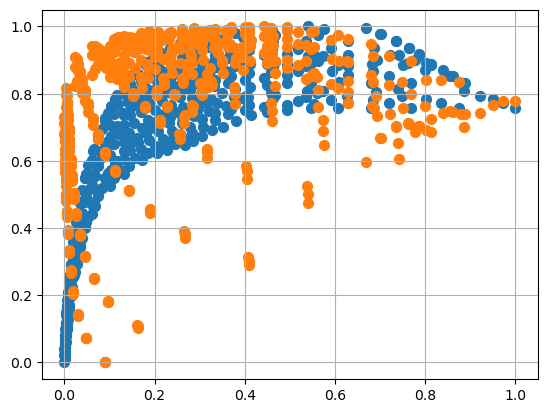

<Figure size 640x480 with 0 Axes>

In [24]:
# plot
plt.scatter(x_datan[:,[2]], y_datan[:,[0]], s=50)
plt.scatter(x_datan[:,[2]], y_datan[:,[1]], s=50)
plt.grid()
plt.show()
plt.savefig('dataset.png',dpi=300)
#files.download('dataset.png') 

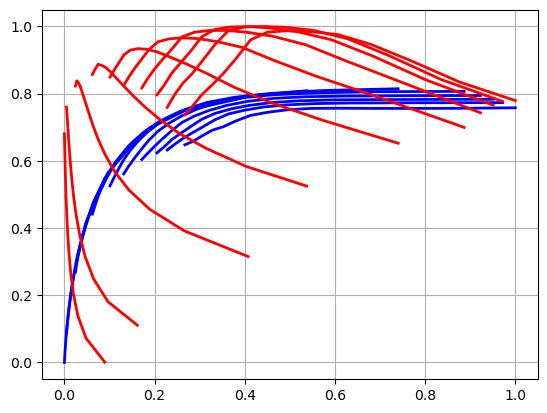

<Figure size 640x480 with 0 Axes>

In [25]:
# plot
# 0: flow, 
plt.plot( x_data1n[:,[2]], y_data1n[:,[0]], 'b', linewidth=2)
plt.plot( x_data2n[:,[2]], y_data2n[:,[0]], 'b', linewidth=2)
plt.plot( x_data3n[:,[2]], y_data3n[:,[0]], 'b', linewidth=2)
plt.plot( x_data4n[:,[2]], y_data4n[:,[0]], 'b', linewidth=2)
plt.plot( x_data5n[:,[2]], y_data5n[:,[0]], 'b', linewidth=2)
plt.plot( x_data6n[:,[2]], y_data6n[:,[0]], 'b', linewidth=2)
plt.plot( x_data7n[:,[2]], y_data7n[:,[0]], 'b', linewidth=2)
plt.plot( x_data8n[:,[2]], y_data8n[:,[0]], 'b', linewidth=2)
plt.plot( x_data9n[:,[2]], y_data9n[:,[0]], 'b', linewidth=2)
plt.plot( x_data10n[:,[2]], y_data10n[:,[0]], 'b', linewidth=2)

# 1: efficiency
plt.plot( x_data1n[:,[2]], y_data1n[:,[1]], 'r', linewidth=2)
plt.plot( x_data2n[:,[2]], y_data2n[:,[1]], 'r', linewidth=2)
plt.plot( x_data3n[:,[2]], y_data3n[:,[1]], 'r', linewidth=2)
plt.plot( x_data4n[:,[2]], y_data4n[:,[1]], 'r', linewidth=2)
plt.plot( x_data5n[:,[2]], y_data5n[:,[1]], 'r', linewidth=2)
plt.plot( x_data6n[:,[2]], y_data6n[:,[1]], 'r', linewidth=2)
plt.plot( x_data7n[:,[2]], y_data7n[:,[1]], 'r', linewidth=2)
plt.plot( x_data8n[:,[2]], y_data8n[:,[1]], 'r', linewidth=2)
plt.plot( x_data9n[:,[2]], y_data9n[:,[1]], 'r', linewidth=2)
plt.plot( x_data10n[:,[2]], y_data10n[:,[1]], 'r', linewidth=2)

plt.grid()
plt.show()
plt.savefig('dataset.png',dpi=300)
#files.download('dataset.png') 

### model

In [26]:
# 2^n,relu,adam,mse

# input layer
n_features = x_datan.shape[1]
inputs  = keras.Input(shape=(n_features,))

dense   = keras.layers.Dense(256, activation="relu")
x       = dense(inputs)
x       = keras.layers.Dense(128, activation="relu")(x)
x       = keras.layers.Dense(64, activation="relu")(x)
x       = keras.layers.Dense(32, activation="relu")(x)
x       = keras.layers.Dense(16, activation="relu")(x)

# output layer
n_qualities = y_datan.shape[1]
outputs = keras.layers.Dense(n_qualities)(x)

# model
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')
#model.summary()

2022-09-01 17:47:34.708725: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-01 17:47:34.792245: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-01 17:47:34.792510: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-01 17:47:34.793167: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

### train

In [27]:
# 3000,64
model.fit(x_datan, y_datan, batch_size=64, epochs=3000, verbose=0)

### predict

In [28]:
# from input
#y_predicted = model.predict(x_datan)
y_predicted1n = model.predict(x_data1n)
y_predicted2n = model.predict(x_data2n)
y_predicted3n = model.predict(x_data3n)
y_predicted4n = model.predict(x_data4n)
y_predicted5n = model.predict(x_data5n)
y_predicted6n = model.predict(x_data6n)
y_predicted7n = model.predict(x_data7n)
y_predicted8n = model.predict(x_data8n)
y_predicted9n = model.predict(x_data9n)
y_predicted10n = model.predict(x_data10n)

1/1 [==============================] - 0s 46ms/step


In [29]:
y_predictedTn = model.predict(x_dataTn) # test

1/1 [==============================] - 0s 23ms/step


In [30]:
x_data1n[:,[2]]

array([[0.        ],
       [0.00037759],
       [0.00083491],
       [0.00138839],
       [0.0020732 ],
       [0.00293157],
       [0.00403149],
       [0.00546913],
       [0.00739224],
       [0.01007756],
       [0.01397068],
       [0.01994873],
       [0.02983632],
       [0.04819028],
       [0.08943862]])

In [31]:
y_data1n[:,[0]]

array([[0.        ],
       [0.00962489],
       [0.02030645],
       [0.03232236],
       [0.04602934],
       [0.06185035],
       [0.08021439],
       [0.10218556],
       [0.12884622],
       [0.16142802],
       [0.20182607],
       [0.25368804],
       [0.32273578],
       [0.41720981],
       [0.54780724]])

### eval


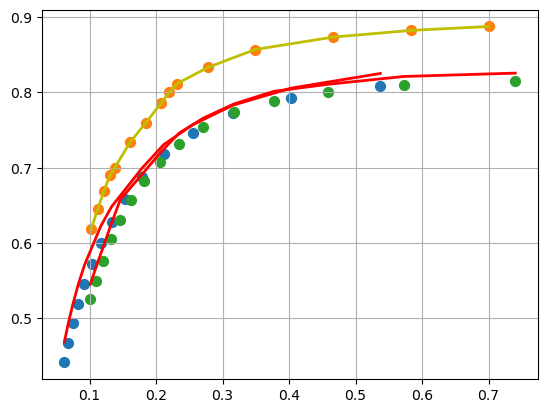

In [32]:
# plot flow

# 0: flow, 
#plt.scatter(x_data1n[:,[2]], y_data1n[:,[0]], s=50)
#plt.plot( x_data1n[:,[2]], y_predicted1n[:,[0]], 'b', linewidth=2)

#plt.scatter(x_data10n[:,[2]], y_data10n[:,[0]], s=50)
#plt.plot( x_data10n[:,[2]], y_predicted10n[:,[0]], 'b', linewidth=2)

# test up flow
plt.scatter(x_data4n[:,[2]], y_data4n[:,[0]], s=50)
plt.plot( x_data4n[:,[2]], y_predicted4n[:,[0]], 'r', linewidth=2)
# test flow
plt.scatter(x_dataTn[:,[2]], y_predictedTn[:,[0]], s=50)
plt.plot( x_dataTn[:,[2]], y_predictedTn[:,[0]], 'y', linewidth=2)
# test down flow
plt.scatter(x_data5n[:,[2]], y_data5n[:,[0]], s=50)
plt.plot( x_data5n[:,[2]], y_predicted5n[:,[0]], 'r', linewidth=2)

plt.grid()
#plt.show()
plt.savefig('training.png', dpi=300)
#files.download("training.png") 

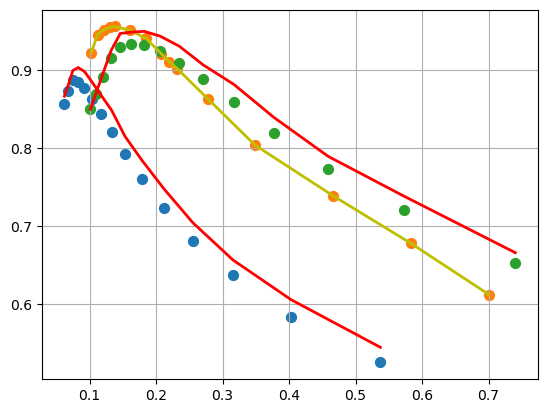

In [33]:
# plot flow

# 1: efficiency
#plt.scatter(x_data1n[:,[2]], y_data1n[:,[1]], s=50)
#plt.plot( x_data1n[:,[2]], y_predicted1n[:,[1]], 'r', linewidth=2)

#plt.scatter(x_data10n[:,[2]], y_data10n[:,[1]], s=50)
#plt.plot( x_data10n[:,[2]], y_predicted10n[:,[1]], 'r', linewidth=2)

# test up efficiency
plt.scatter(x_data4n[:,[2]], y_data4n[:,[1]], s=50)
plt.plot( x_data4n[:,[2]], y_predicted4n[:,[1]], 'r', linewidth=2)
# test efficiency
plt.scatter(x_dataTn[:,[2]], y_predictedTn[:,[1]], s=50)
plt.plot( x_dataTn[:,[2]], y_predictedTn[:,[1]], 'y', linewidth=2)
# test down efficiency
plt.scatter(x_data5n[:,[2]], y_data5n[:,[1]], s=50)
plt.plot( x_data5n[:,[2]], y_predicted5n[:,[1]], 'r', linewidth=2)


plt.grid()
#plt.show()
plt.savefig('training.png', dpi=300)
#files.download("training.png") 

### video


In [34]:
#for x in range(100):
#  # One epoch
#  model.fit( x_data, y_data, epochs=1, verbose=1)
#
#  # Compute the output 
#  y_predicted = model.predict(x_data)
#
#  # Display the result
#  plt.scatter(x_data[::1], y_data[::1], s=2)
#  plt.plot(x_data, y_predicted, 'r', linewidth=4)
#  plt.grid()
#  plt.ylim(top=1.2)  # adjust the top leaving bottom unchanged
#  plt.ylim(bottom=-1.2)  
#  #plt.show()
#  plt.savefig('training-' + str(x) +'-epochs.png',dpi=300)
#  #files.download('training-' + str(x) +'-epochs.png') 
#  plt.clf()

